# Comparative Analysis
In this notebook, we compare the six competitors on MOSAD.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange # Version: 3.30.1
import sys
sys.path.append("../")

from tqdm import tqdm

In [3]:
from src.utils import load_mosad_dataset

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the MOSAD dataset.

In [5]:
df_mosad = load_mosad_dataset()
df_mosad.head()

,dataset,routine,subject,sensor,sample_rate,change_points,activities,time_series
0,Routine1_Subject1_X-Acc,1,1,X-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.1986, -0.454326, -0.5473, -0.496056, -0.48..."
1,Routine1_Subject1_X-Gyro,1,1,X-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[0.0174, 0.0358, 0.0431, 0.0358, 0.0168, 0.008..."
2,Routine1_Subject1_X-Mag,1,1,X-Mag,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-31.02, -30.84, -30.65, -30.58, -31.52, -30.7..."
3,Routine1_Subject1_Y-Acc,1,1,Y-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.0161, -0.100877, -0.1434, -0.13972, -0.081..."
4,Routine1_Subject1_Y-Gyro,1,1,Y-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.0525, -0.0568, -0.0482, -0.0012, 0.0153, 0..."


Let's load the scores from the different methods.

In [6]:
competitors = ["BOCD", "Window", "BinSeg", "ESPRESSO", "FLOSS", "ClaSP"]
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/{file_name}", usecols=["dataset", eval_score], compression="gzip")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,BOCD,Window,BinSeg,ESPRESSO,FLOSS,ClaSP
0,Routine1_Subject1_X-Acc,0.377,0.436,0.248,0.251,0.501,0.452
1,Routine1_Subject1_X-Gyro,0.402,0.323,0.329,0.466,0.654,0.438
2,Routine1_Subject1_X-Mag,0.281,0.465,0.428,0.675,0.401,0.448
3,Routine1_Subject1_Y-Acc,0.361,0.258,0.513,0.667,0.476,0.713
4,Routine1_Subject1_Y-Gyro,0.499,0.284,0.312,0.304,0.568,0.440
5,Routine1_Subject1_Y-Mag,0.472,0.598,0.517,0.552,0.434,0.555
6,Routine1_Subject1_Z-Acc,0.232,0.457,0.420,0.619,0.579,0.569
7,Routine1_Subject1_Z-Gyro,0.428,0.494,0.341,0.716,0.603,0.444
8,Routine1_Subject1_Z-Mag,0.357,0.602,0.472,0.525,0.624,0.655
9,Routine1_Subject2_X-Acc,0.455,0.415,0.579,0.662,0.564,0.579


Let's calculate the mean/median/std score.

In [7]:
df_scores.mean(axis=0).round(3) * 100

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_39764/241070406.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3) * 100


BOCD        50.2
Window      56.1
BinSeg      62.9
ESPRESSO    61.8
FLOSS       66.3
ClaSP       74.0
dtype: float64

In [8]:
df_scores.median(axis=0).round(3) * 100

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_39764/2045008443.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3) * 100


BOCD        49.2
Window      54.4
BinSeg      60.6
ESPRESSO    60.3
FLOSS       64.0
ClaSP       75.0
dtype: float64

In [9]:
df_scores.std(axis=0).round(3) * 100

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_39764/4047107768.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3) * 100


BOCD        16.0
Window      18.6
BinSeg      23.5
ESPRESSO    15.8
FLOSS       14.4
ClaSP       21.1
dtype: float64

Let's compute the wins per method.

In [10]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [11]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

BOCD:wins=0 rank=4.9
Window:wins=10 rank=4.1
BinSeg:wins=8 rank=3.5
ESPRESSO:wins=17 rank=3.4
FLOSS:wins=36 rank=2.9
ClaSP:wins=57 rank=2.2


Let's plot and output the ranks.

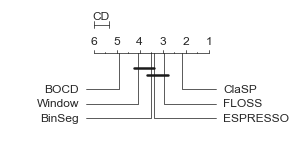

In [12]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4, textspace=1.2, filename=f"../figures/cd_competitor.pdf")

Let's compute wins/losses against the best-ranking algorithm ClaSP.

In [13]:
selection = "ClaSP"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSP vs BOCD: (wins/ties/losses): 110/0/16
ClaSP vs Window: (wins/ties/losses): 101/0/25
ClaSP vs BinSeg: (wins/ties/losses): 102/1/23
ClaSP vs ESPRESSO: (wins/ties/losses): 89/0/37
ClaSP vs FLOSS: (wins/ties/losses): 79/2/45


Lastly, let us compute a boxplot over the scores.

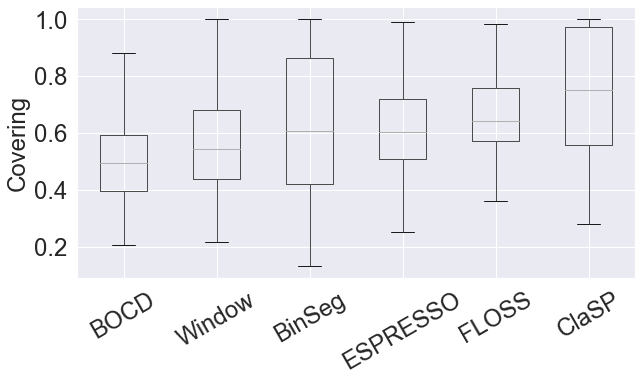

In [14]:
fontsize = 24
_, ax = plt.subplots(figsize=(10,5))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.savefig(f"../figures/bp_competitor.pdf", bbox_inches="tight") 